In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/DSA2019-Challenge/HackAI-Tunisia"

submession_file.csv  submission_lreg.csv       Test_v2.csv
submission.csv	     submission_rd.csv	       Train_v2.csv
submission_DT.csv    SubmissionSubmission.csv  VariableDefinitions.csv
submission_file.csv  submission_svm.csv
SubmissionFile.csv   Test.csv


In [0]:
import pandas as pd
import tensorflow as tf
import numpy as np


import os

os.chdir("/content/drive/My Drive/DSA2019-Challenge/HackAI-Tunisia")
!pwd

/content/drive/My Drive/DSA2019-Challenge/HackAI-Tunisia


In [0]:
train= pd.read_csv("Train_v2.csv")
test = pd.read_csv("Test_v2.csv")

submission_file=pd.read_csv("SubmissionFile.csv")
Variables=pd.read_csv("VariableDefinitions.csv")

In [0]:
#test_data= pd.read_csv("Test.csv")


In [0]:
test.shape

(10086, 12)

In [0]:
uniqueid = test["uniqueid"] + " x " + test["country"]
uniqueid

0         uniqueid_6056 x Kenya
1         uniqueid_6060 x Kenya
2         uniqueid_6065 x Kenya
3         uniqueid_6072 x Kenya
4         uniqueid_6073 x Kenya
5         uniqueid_6074 x Kenya
6         uniqueid_6075 x Kenya
7         uniqueid_6076 x Kenya
8         uniqueid_6077 x Kenya
9         uniqueid_6078 x Kenya
10        uniqueid_6079 x Kenya
11        uniqueid_6080 x Kenya
12        uniqueid_6081 x Kenya
13        uniqueid_6082 x Kenya
14        uniqueid_6083 x Kenya
15        uniqueid_6084 x Kenya
16        uniqueid_6085 x Kenya
17        uniqueid_6086 x Kenya
18        uniqueid_6087 x Kenya
19        uniqueid_6088 x Kenya
20        uniqueid_6089 x Kenya
21        uniqueid_6090 x Kenya
22        uniqueid_6091 x Kenya
23        uniqueid_6092 x Kenya
24        uniqueid_6093 x Kenya
25        uniqueid_6094 x Kenya
26        uniqueid_6095 x Kenya
27        uniqueid_6096 x Kenya
28        uniqueid_6097 x Kenya
29        uniqueid_6098 x Kenya
                  ...          
10056   

In [0]:
test.isnull().sum(axis=0)

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import preprocessing

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


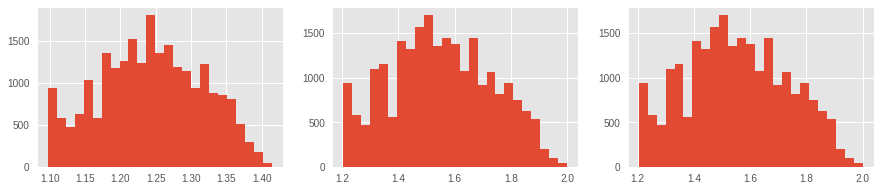

In [0]:
log_age = train.age_of_respondent.apply(np.log10)
test_log_age = test.age_of_respondent.apply(np.log10)

train.age_of_respondent = log_age
test.age_of_respondent = test_log_age

root_age = train.age_of_respondent.apply(np.sqrt)
plt.subplot(331)
hist_sqrt_age = root_age.hist(bins=25,figsize=[15,10]) ## sqrt applied to age
plt.subplot(332)
hist_log_age = log_age.hist(bins=25,figsize=[15,10]) ## log10 applied to age
plt.subplot(333)
hist_age = train.age_of_respondent.hist(bins=25,figsize=[15,10]) ## original distribution

In [0]:
test[test.uniqueid.duplicated(keep=False)].sort_values(by='uniqueid').head(6)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
421,Kenya,2018,uniqueid_6490,Urban,Yes,1,1.397940,Female,Head of Household,Divorced/Seperated,Primary education,Informally employed
6346,Tanzania,2017,uniqueid_6490,Rural,Yes,3,1.518514,Male,Head of Household,Single/Never Married,Secondary education,Self employed
6347,Tanzania,2017,uniqueid_6498,Urban,Yes,2,1.342423,Female,Spouse,Single/Never Married,Secondary education,Self employed
429,Kenya,2018,uniqueid_6498,Rural,Yes,4,1.556303,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
433,Kenya,2018,uniqueid_6502,Urban,Yes,4,1.518514,Female,Spouse,Married/Living together,Primary education,Self employed
6348,Tanzania,2017,uniqueid_6502,Rural,Yes,7,1.623249,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [0]:
train[train.uniqueid.duplicated(keep=False)].sort_values(by='uniqueid').head(4)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,1.380211,Female,Spouse,Married/Living together,Secondary education,Self employed
14803,Tanzania,2017,uniqueid_1,No,Rural,Yes,6,1.342423,Female,Child,Divorced/Seperated,Secondary education,No Income
21423,Uganda,2018,uniqueid_1,No,Rural,No,5,1.505150,Female,Head of Household,Divorced/Seperated,Primary education,Other Income
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7,1.255273,Female,Child,Single/Never Married,Secondary education,Remittance Dependent


In [0]:
## target encoding
di = {"Yes": 1, "No": 0}
train.replace({"bank_account": di},inplace=True)

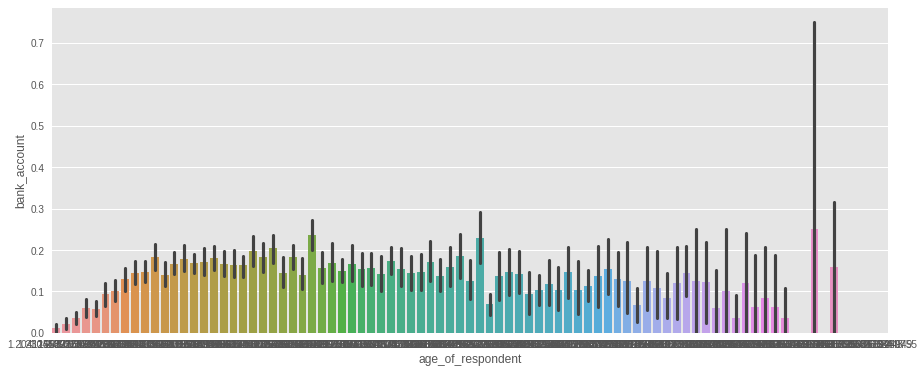

In [0]:
plt.figure(figsize=[15,6])
sns.barplot('age_of_respondent', 'bank_account', data=train)

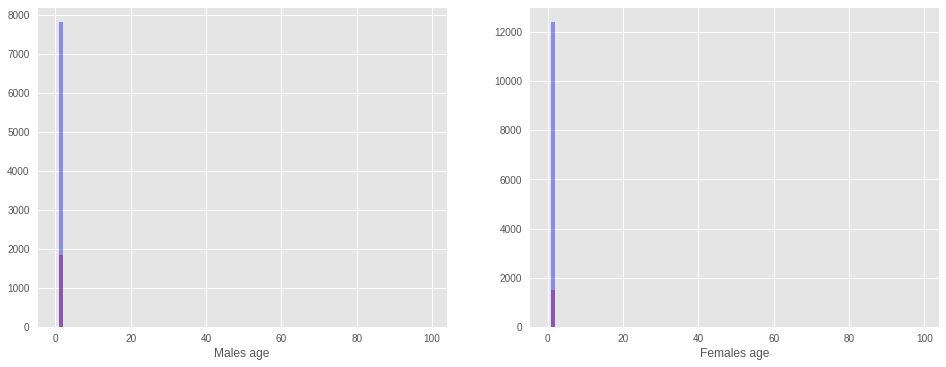

In [0]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.distplot(train[(train.gender_of_respondent=='Male')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.gender_of_respondent=='Male')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Males age')
plt.subplot(332)
sns.distplot(train[(train.gender_of_respondent=='Female')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.gender_of_respondent=='Female')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Females age')

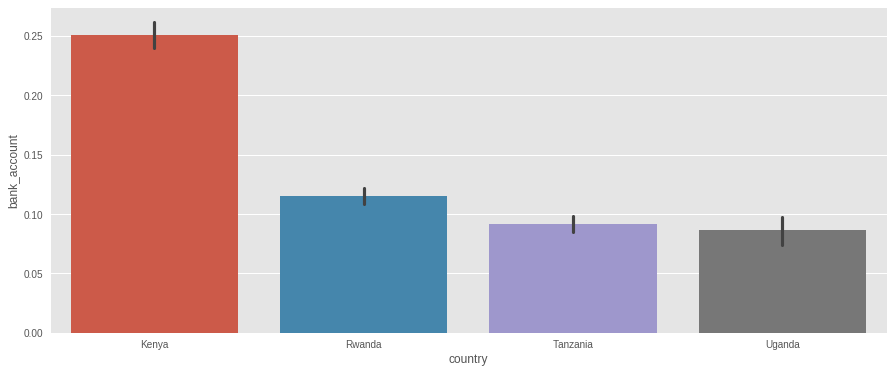

In [0]:
plt.figure(figsize=[15,6])
sns.barplot('country', 'bank_account', data=train)

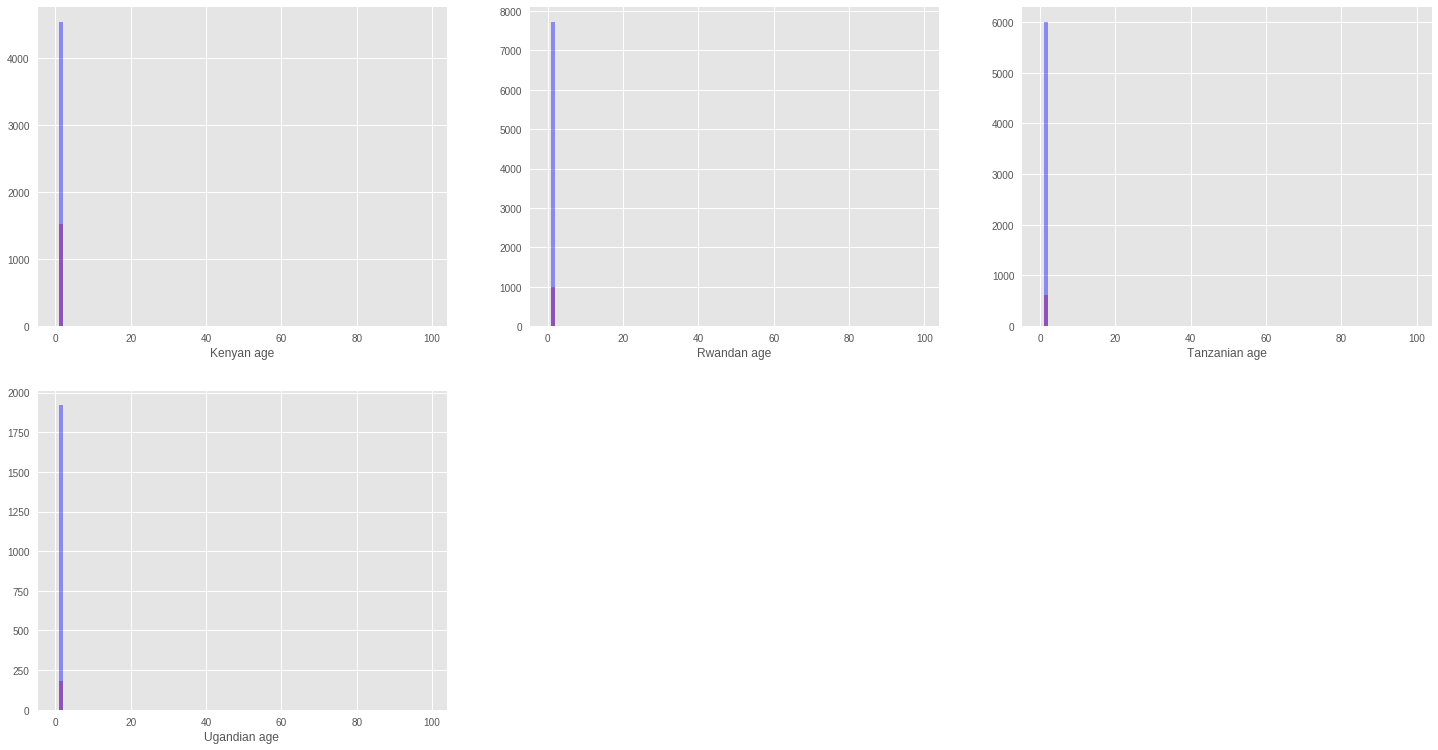

In [0]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.distplot(train[(train.country=='Kenya')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Kenya')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Kenyan age')
plt.subplot(332)
sns.distplot(train[(train.country=='Rwanda')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Rwanda')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Rwandan age')
plt.subplot(333)
sns.distplot(train[(train.country=='Tanzania')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Tanzania')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Tanzanian age')
plt.subplot(334)
sns.distplot(train[(train.country=='Uganda')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Uganda')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Ugandian age')

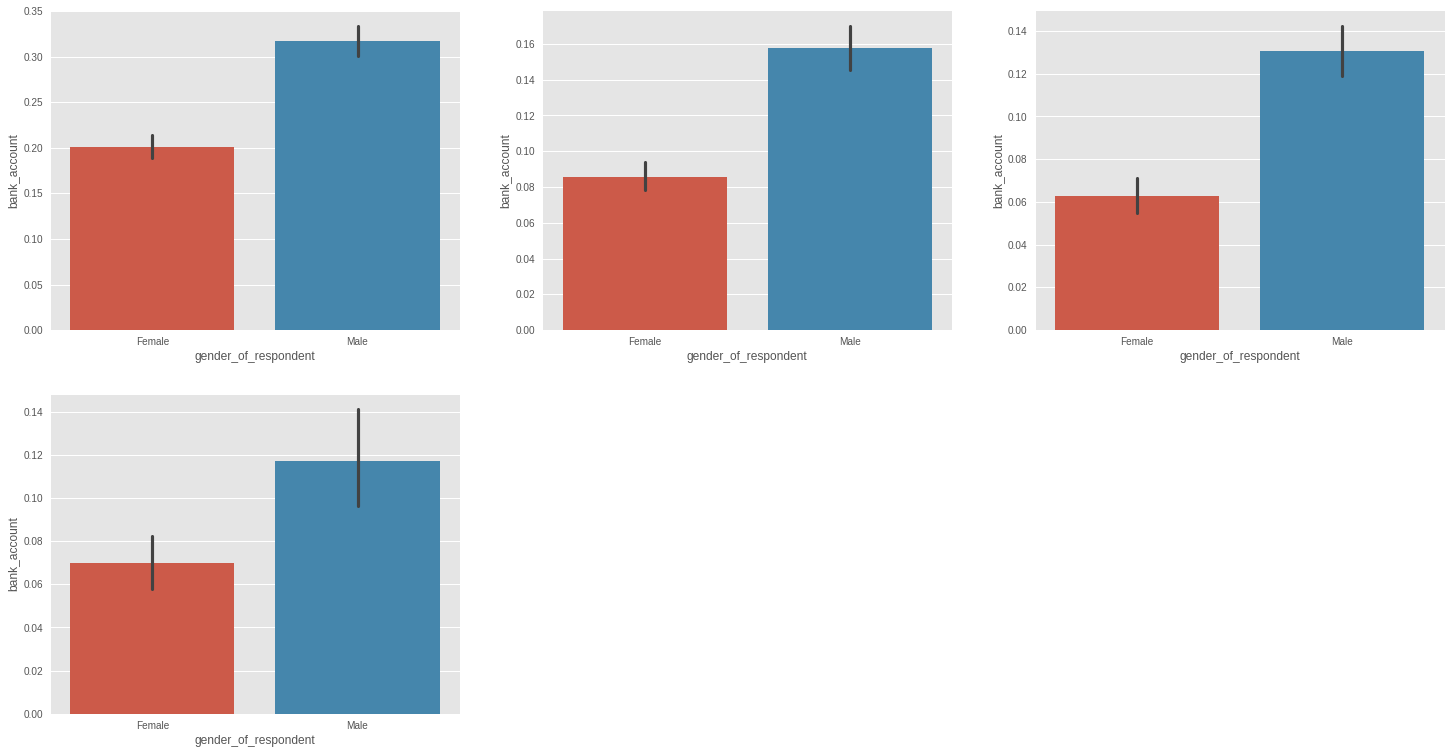

In [0]:
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.barplot('gender_of_respondent', 'bank_account', data=train[(train.country=='Kenya')])
plt.subplot(332)
sns.barplot('gender_of_respondent', 'bank_account', data=train[(train.country=='Rwanda')])
plt.subplot(333)
sns.barplot('gender_of_respondent', 'bank_account', data=train[(train.country=='Tanzania')])
plt.subplot(334)
sns.barplot('gender_of_respondent', 'bank_account', data=train[(train.country=='Uganda')])

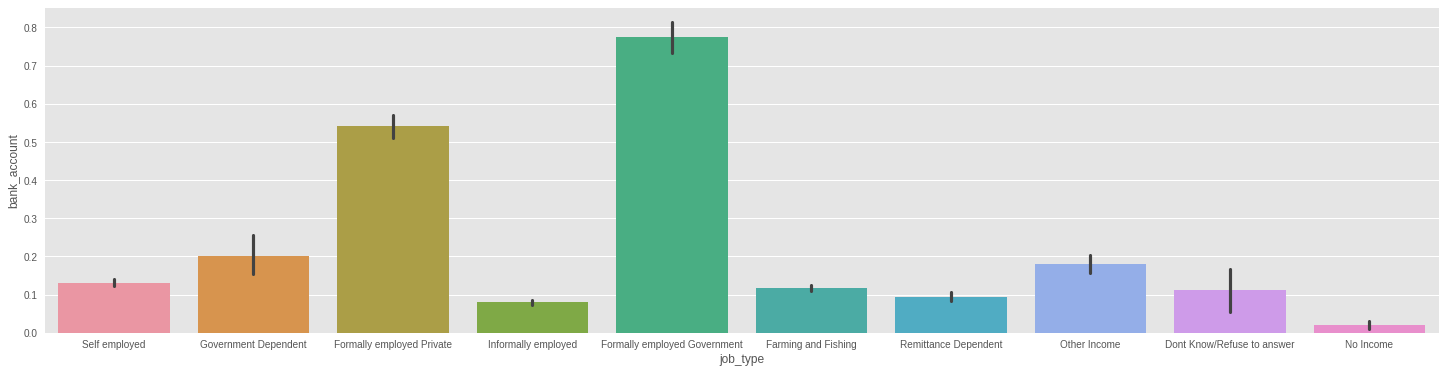

In [0]:
plt.figure(figsize=[25,6])
sns.barplot('job_type', 'bank_account', data=train)

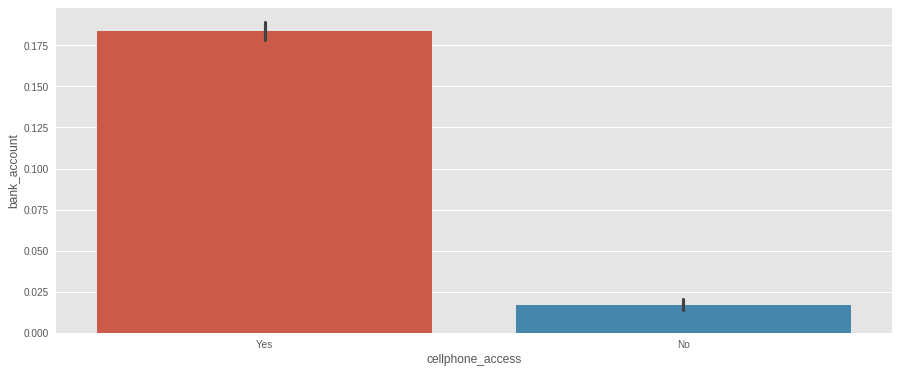

In [0]:
plt.figure(figsize=[15,6])
sns.barplot('cellphone_access', 'bank_account', data=train)

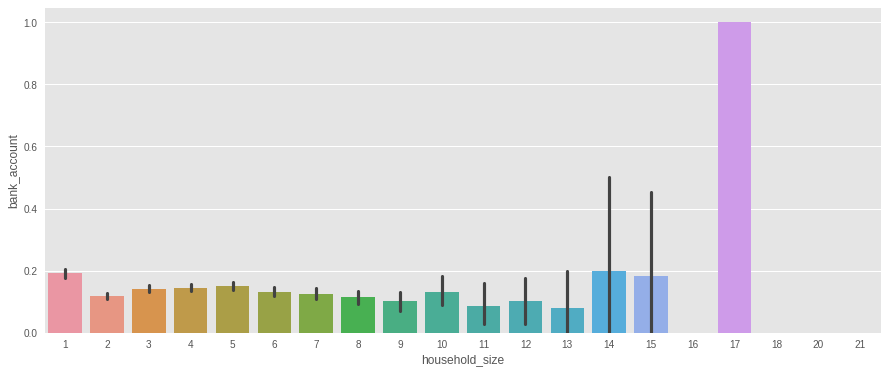

In [0]:
plt.figure(figsize=[15,6])
sns.barplot('household_size', 'bank_account', data=train)

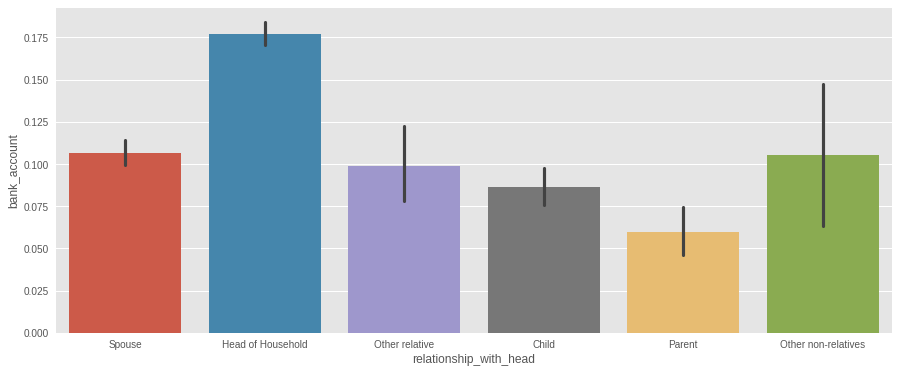

In [0]:
plt.figure(figsize=[15,6])
sns.barplot('relationship_with_head', 'bank_account', data=train)

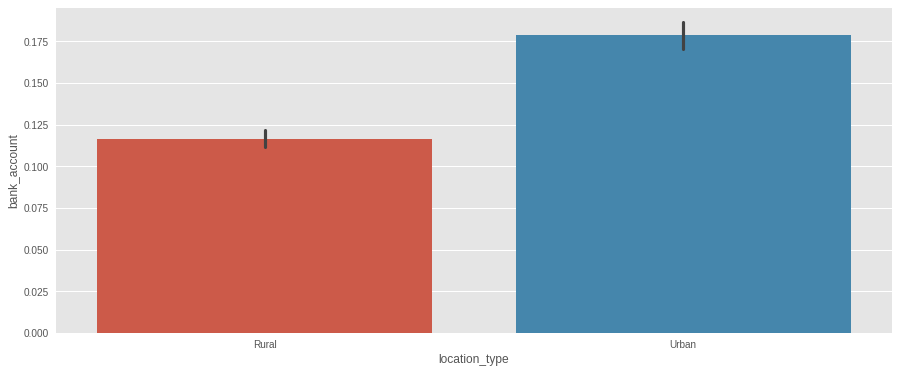

In [0]:
plt.figure(figsize=[15,6])
sns.barplot('location_type', 'bank_account', data=train)

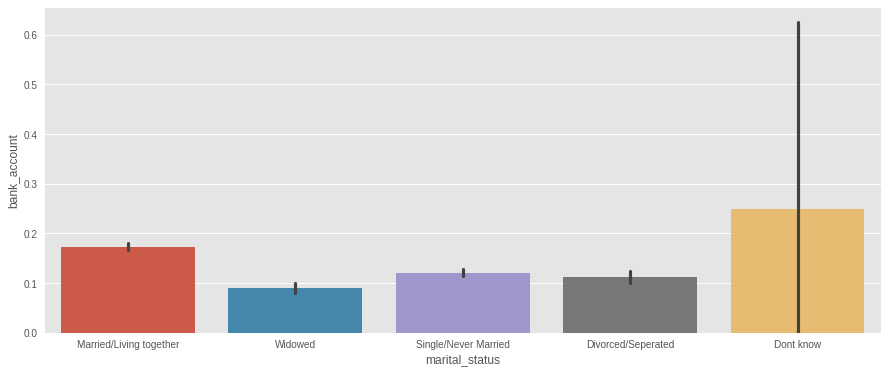

In [0]:
plt.figure(figsize=[15,6])
sns.barplot('marital_status', 'bank_account', data=train)

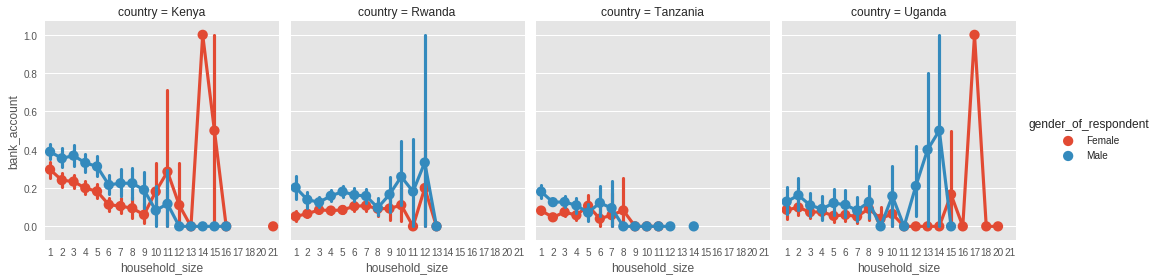

In [0]:
g = sns.factorplot(x="household_size", y="bank_account", hue="gender_of_respondent", col="country",
                   data=train, aspect=0.9, size=4, ci=95.0)

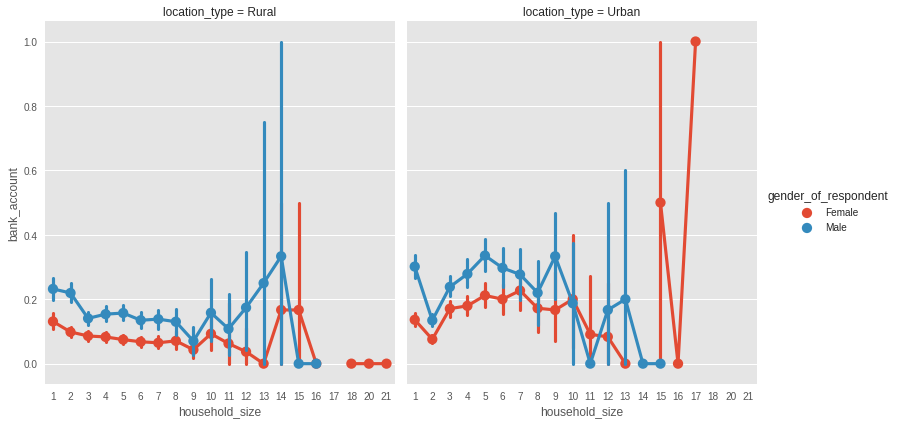

In [0]:
g = sns.factorplot(x="household_size", y="bank_account", hue="gender_of_respondent", col="location_type",
                   data=train, aspect=0.9, size=6, ci=95.0)

In [0]:
bins = [0, 1, 10, 25]
labels = [1,2,3]
train['familysize'] = pd.cut(train['household_size'], bins=bins, labels=labels)
train.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,familysize
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,2
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,2
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,2


In [0]:
bins = [0, 1, 10, 25]
labels = [1,2,3]
test['familysize'] = pd.cut(test['household_size'], bins=bins, labels=labels)
test.head(5)

,household_size,gender_of_respondent,relationship_with_head,marital_status,binnedage,familysize
0,3,1,1,2,2,2
1,7,1,1,2,4,2
2,3,0,4,2,5,2
3,6,0,1,2,3,2
4,3,1,0,3,1,2


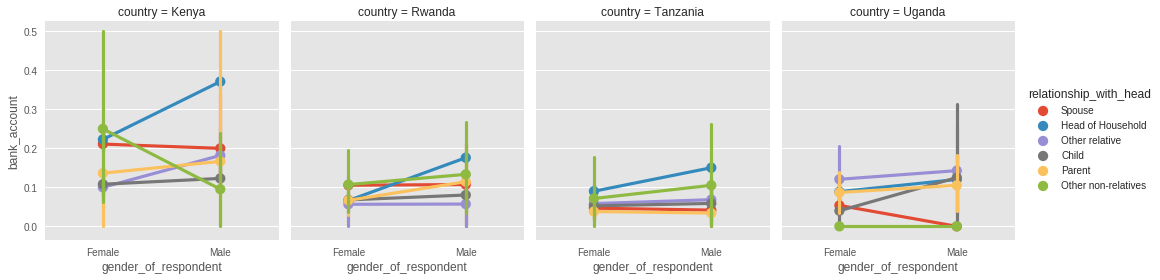

In [0]:
g = sns.factorplot(x="gender_of_respondent", y="bank_account", hue="relationship_with_head", col="country",
                   data=train, aspect=0.9, size=4, ci=95.0)

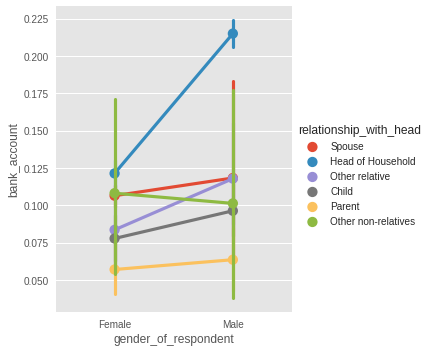

In [0]:
g = sns.factorplot(x="gender_of_respondent", y="bank_account", hue="relationship_with_head",
                   data=train, aspect=0.9, size=5, ci=95.0)

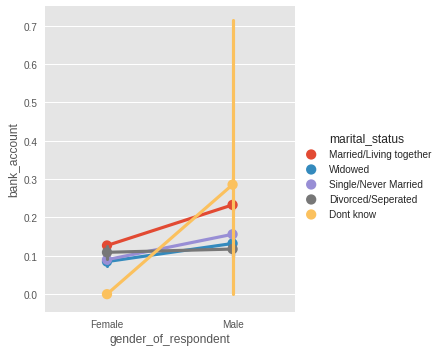

In [0]:
g = sns.factorplot(x="gender_of_respondent", y="bank_account", hue="marital_status",
                   data=train, aspect=0.9, size=5, ci=95.0)

In [0]:
## binning the age!
bins = [10, 20, 30, 40,60,80,100]
labels = [1,2,3,4,5,6]
train['binnedage'] = pd.cut(train['age_of_respondent'], bins=bins, labels=labels)

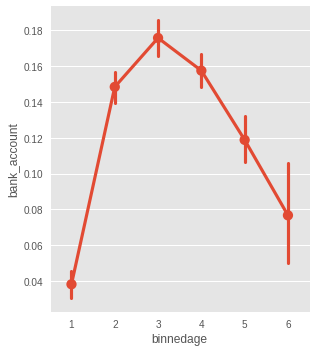

In [0]:
g = sns.factorplot(x="binnedage", y="bank_account",
                   data=train, aspect=0.9, size=5, ci=95.0)

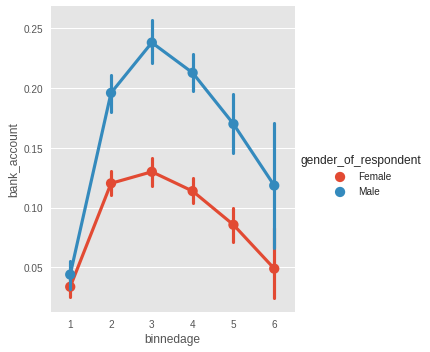

In [0]:
g = sns.factorplot(x="binnedage", y="bank_account", hue="gender_of_respondent",
                   data=train, aspect=0.9, size=5, ci=95.0)

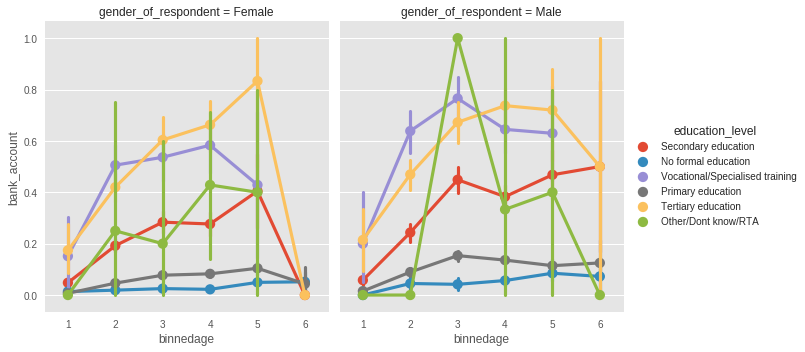

In [0]:
g = sns.factorplot(x="binnedage", y="bank_account", hue="education_level",col='gender_of_respondent',
                   data=train, aspect=0.9, size=5, ci=95.0)

In [0]:
train  =train.drop(["familysize"], axis  =1 )

In [0]:
train.year = pd.Categorical(train.year).codes
train.relationship_with_head = pd.Categorical(train.relationship_with_head).codes
train.marital_status = pd.Categorical(train.marital_status).codes
train.education_level = pd.Categorical(train.education_level).codes
train.job_type = pd.Categorical(train.job_type).codes

In [0]:
#train.age_of_respondent = root_age
train.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2,uniqueid_1,1,Rural,Yes,3,1.380211,Female,5,2,3,9
1,Kenya,2,uniqueid_2,0,Rural,No,5,1.845098,Female,1,4,0,4
2,Kenya,2,uniqueid_3,1,Urban,Yes,5,1.414973,Male,3,3,5,9
3,Kenya,2,uniqueid_4,0,Rural,Yes,5,1.531479,Female,1,2,2,3
4,Kenya,2,uniqueid_5,0,Urban,No,8,1.414973,Male,0,3,2,5


In [0]:
## feature encoding
di = {"Yes": 1, "No": 0}
dx = {"Rural": 0,"Urban": 1}
dy ={"Female": 0, "Male": 1}

train.country = pd.Categorical(train.country).codes
train.replace({"cellphone_access": di},inplace=True)
train.replace({"location_type": dx},inplace=True)
train.replace({"gender_of_respondent": dy},inplace=True)


In [0]:
# feature encoding for test data
di = {"Yes": 1, "No": 0}
dx = {"Rural": 0,"Urban": 1}
dy ={"Female": 0, "Male": 1}

test.country = pd.Categorical(test.country).codes
test.replace({"cellphone_access": di},inplace=True)
test.replace({"location_type": dx},inplace=True)
test.replace({"gender_of_respondent": dy},inplace=True)

In [0]:
test.year = pd.Categorical(test.year).codes
test.relationship_with_head = pd.Categorical(test.relationship_with_head).codes
test.marital_status = pd.Categorical(test.marital_status).codes
test.education_level = pd.Categorical(test.education_level).codes
test.job_type = pd.Categorical(test.job_type).codes

In [0]:
train = train.drop(["uniqueid"],axis =1)
train.head(3)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,0,1,3,1.380211,0,5,2,3,9
1,0,2,0,0,0,5,1.845098,0,1,4,0,4
2,0,2,1,1,1,5,1.414973,1,3,3,5,9


In [0]:
di = {"Yes": 1, "No": 0}


test.replace({"bank_account": di},inplace=True)
test.head(5)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,uniqueid_6056,1,1,3,1.477121,1,1,2,3,2
1,0,2,uniqueid_6060,1,1,7,1.707570,1,1,2,5,3
2,0,2,uniqueid_6065,0,0,3,1.886491,0,4,2,0,8
3,0,2,uniqueid_6072,0,0,6,1.591065,0,1,2,2,8
4,0,2,uniqueid_6073,1,0,3,1.204120,1,0,3,3,8


In [0]:
test= test.drop(["uniqueid"],axis =1)
test.head(5)

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,1,3,1.477121,1,1,2,3,2
1,0,2,1,1,7,1.707570,1,1,2,5,3
2,0,2,0,0,3,1.886491,0,4,2,0,8
3,0,2,0,0,6,1.591065,0,1,2,2,8
4,0,2,1,0,3,1.204120,1,0,3,3,8


In [0]:
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [0]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 10 # set folds for out-of-fold prediction
kf = KFold(n_splits=NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer


In [0]:


def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)



In [0]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     'max_features': 0.2,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
   'n_estimators': 500,
   'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
   'n_estimators': 500,
   'max_features': 0.2,
 'max_depth': 8,
'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
   'kernel' : 'linear',
    'C' : 0.025
    }


In [0]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['bank_account'].ravel()
train = train.drop(['bank_account'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

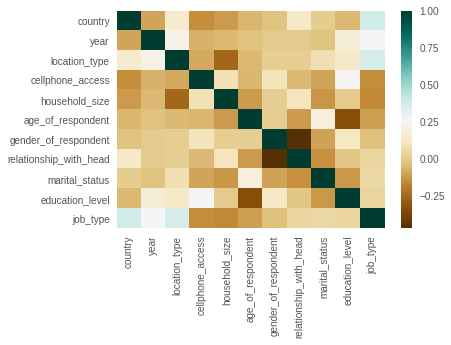

In [0]:
g = sns.heatmap(train.corr(),cmap="BrBG",annot=False)

In [0]:
train.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,0,1,3,1.380211,0,5,2,3,9
1,0,2,0,0,5,1.845098,0,1,4,0,4
2,0,2,1,1,5,1.414973,1,3,3,5,9
3,0,2,0,1,5,1.531479,0,1,2,2,3
4,0,2,1,0,8,1.414973,1,0,3,2,5


In [0]:
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data


 Feature Names: 

 [0 1 2 3 4] 


Feature Correlation:



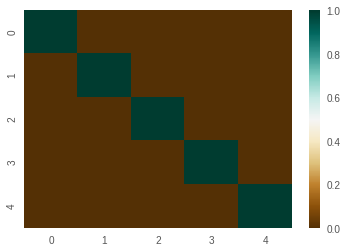

In [0]:
from sklearn.decomposition import PCA
X=x_train
y=y_train
variance_pct = 5 # Minimum percentage of variance we want to be described by the resulting transformed components
pca = PCA(n_components=variance_pct) # Create PCA object
X_transformed = pca.fit_transform(X,y) # Transform the initial features
X3pca = pd.DataFrame(X_transformed) # Create a data frame from the PCA'd data
print('\n Feature Names: \n\n', X3pca.columns.values, "\n")
#print('First Few Values, After PCA: \n\n,',X3pca.head(),'\n\n')
print("\nFeature Correlation:\n")
g = sns.heatmap(X3pca.corr(),cmap="BrBG",annot=False)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=2)
clf.fit(X3pca, y)
print(clf.score(X3pca, y))

0.8769767046420677


In [0]:
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [0]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(n_estimators=500)
rd.fit(X_train, y_train)
RdForestperfmce = round(rd.score(X_train, y_train) * 100, 2)
print("Accuracy with Random Forest : {}".format(RdForestperfmce))

Accuracy with Random Forest : 97.81


In [0]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, X_train, y_train, X_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,X_train, y_train, X_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,X_train, y_train, X_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,X_train, y_train, X_test) # Support Vector Classifier

print("Training is complete")

Training is complete


In [0]:
rf_feature = rf.feature_importances(X_train,y_train)
et_feature = et.feature_importances(X_train, y_train)
ada_feature = ada.feature_importances(X_train, y_train)
gb_feature = gb.feature_importances(X_train,y_train)

[0.06007675 0.03988838 0.04624742 0.08111829 0.03428284 0.10247721
 0.02726049 0.03287576 0.02298471 0.39502501 0.15776315]
[0.08723792 0.05406927 0.06314055 0.13622681 0.00964953 0.03769316
 0.03518037 0.02822671 0.01728573 0.43345599 0.09783396]
[0.014 0.008 0.004 0.004 0.042 0.646 0.002 0.022 0.008 0.034 0.216]
[0.07479459 0.03186111 0.04904796 0.05123081 0.08084887 0.18711358
 0.0304215  0.04367721 0.03587007 0.26586968 0.14926462]


In [0]:
rf_features =[0.06007675, 0.03988838, 0.04624742 ,0.08111829 ,0.03428284, 0.10247721,
 0.02726049, 0.03287576, 0.02298471, 0.39502501, 0.15776315]
et_features = [0.08723792 ,0.05406927, 0.06314055 ,0.13622681 ,0.00964953 ,0.03769316,
 0.03518037, 0.02822671 ,0.01728573 ,0.43345599, 0.09783396]
ada_features =[0.014, 0.008, 0.004, 0.004 ,0.042 ,0.646, 0.002 ,0.022 ,0.008, 0.034 ,0.216]
gb_features =[0.07479459 ,0.03186111, 0.04904796, 0.05123081, 0.08084887, 0.18711358,
 0.0304215 , 0.04367721 ,0.03587007, 0.26586968, 0.14926462]

In [0]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
    'Random Forest feature importances': rf_features,
    'Extra Trees  feature importances': et_features,
     'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })

In [0]:
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances,mean
0,country,0.060077,0.087238,0.014,0.074795,0.059027
1,year,0.039888,0.054069,0.008,0.031861,0.033455
2,location_type,0.046247,0.063141,0.004,0.049048,0.040609


In [0]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
     'GradientBoost': gb_oof_train.ravel(),
     'SVC': svc_oof_train.ravel()
    })
base_predictions_train.head()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost,SVC
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [0]:


x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test,ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

#x_train =gb_oof_train
#x_test = gb_oof_test

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [0]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.0.1-cp36-none-any.whl size=10032 sha256=cc76af324faa1e736e8c8ff62c7137873e6d23a6777dd0aa750a1658361b904a
  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [0]:
from bayes_opt import BayesianOptimization
dtrain = xgb.DMatrix(X_train, label=y_train)
#dtest = xgb.DMatrix(X_test,label = y_test)
  
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
  params = {'max_depth': int(max_depth),
            'gamma': gamma,
            'n_estimators': int(n_estimators),
            'learning_rate':learning_rate,
            #'reg_alpha': 0.005,
            #'reg_lambda':0.8,
            'colsample_bytree':0.8,
            'min_child_weight': 6,
            'subsample': 0.8,
            'eta': 0.1,
            'eval_metric': 'rmse'}
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
  return -1.0 * cv_result['test-rmse-mean'].iloc[-1]
    
    
    
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,120)
                                            #'min_child_weight':(0,1)
                                              #'reg_alpha':(0,1),
                                             # 'reg_lambda':(0,1)
                                            
                                           })

xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.2945   |  0.2919   |  0.2456   |  7.531    |  102.6    |
|  2        | -0.2903   |  0.006881 |  0.1415   |  4.611    |  111.2    |
|  3        | -0.301    |  0.3423   |  0.9928   |  4.212    |  113.1    |
|  4        | -0.2903   |  0.9515   |  0.1387   |  7.128    |  113.3    |
|  5        | -0.2935   |  0.5554   |  0.3346   |  7.449    |  102.9    |
|  6        | -0.2989   |  0.2163   |  0.4377   |  6.862    |  111.0    |
|  7        | -0.3096   |  0.3125   |  0.5065   |  9.798    |  111.2    |
|  8        | -0.304    |  0.9961   |  0.9105   |  8.275    |  108.4    |
|  9        | -0.5      |  1.0      |  0.0      |  3.0      |  100.0    |
|  10       | -0.5      |  0.0      |  0.0      |  3.0      |  120.0    |
|  11       | -0.5      |  1.0      |  0.0      |  10.0     |  100.9    |
|  12       | -0.3162   |  0.0      | 

In [0]:
params = xgb_bo.max['params']
print(params)

params['max_depth']= 4
params['n_estimators']= 117
params['gamma'] = 0.1
params['learning_rate'] = 0.01

{'gamma': 0.0068807472282989, 'learning_rate': 0.14146108510963917, 'max_depth': 4.61073900009445, 'n_estimators': 111.18316012078569}


In [0]:
gbm = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=4,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 iid=False,
 seed=27
).fit(X_train, y_train)
print(gbm.score(X_train,y_train))

0.8918126169018874


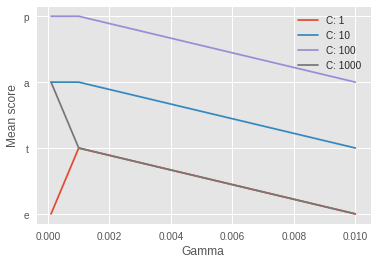

In [0]:
from sklearn.model_selection import GridSearchCV

Cs = [1, 10, 100, 1000]
Gammas = [1e-2, 1e-3,1e-4]
clf = GridSearchCV(gbm,
            dict(C=Cs,
                 gamma=Gammas),
                 cv=2,
                 pre_dispatch='1*n_jobs',
                 n_jobs=1)

clf.fit(X_train, y_train)



scores = [x[1] for x in clf.cv_results_]
scores = np.array(scores).reshape(len(Cs), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [0]:
#submission_df = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"], "bank_account": predictions})

#submission_df.to_csv("submission_file.csv",index=False)


submission = pd.DataFrame(index=test.index,columns=['uniqueid','bank_account'])
submission['uniqueid'] = uniqueid
submission.bank_account=predictions
submission.to_csv('submission.csv',index=False)


In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10)
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

0.8854361503145723

In [0]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32,activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
23524/23524 [==============================] - 2s 66us/sample - loss: 0.4063 - acc: 0.8539
Epoch 2/10
23524/23524 [==============================] - 1s 49us/sample - loss: 0.3592 - acc: 0.8678
Epoch 3/10
23524/23524 [==============================] - 1s 48us/sample - loss: 0.3466 - acc: 0.8698
Epoch 4/10
23524/23524 [==============================] - 1s 48us/sample - loss: 0.3389 - acc: 0.8701
Epoch 5/10
23524/23524 [==============================] - 1s 49us/sample - loss: 0.3326 - acc: 0.8705
Epoch 6/10
23524/23524 [==============================] - 1s 49us/sample - loss: 0.3282 - acc: 0.8696
Epoch 7/10
23524/23524 [==============================] - 1s 50us/sample - loss: 0.3254 - acc: 0.8728
Epoch 8/10
23524/23524 [==============================] - 1s 50us/sample -

In [0]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel = 'rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train,y_train))

0.8863288556367964


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 100)
rfe = rfe.fit(x_train, y_train)
print("accuracy score on training is",rfe.score(x_train,y_train))

accuracy score on training is 0.874553647338888


In [0]:
submission = pd.DataFrame(index=test.index,columns=['uniqueid','bank_account'])

submission['uniqueid'] = uniqueid

submission['bank_account'] = rd.predict(X_test)

## create submit_file

submission.to_csv('submission_rd.csv',index=False)

NameError: ignored

In [0]:
submission = pd.DataFrame(index=test.index,columns=['uniqueid','bank_account'])

submission['uniqueid'] = uniqueid

submission['bank_account'] = gbm.predict(X_test)

## create submit_file

submission.to_csv('submission.csv',index=False)

In [0]:
s = pd.read_csv("submission.csv")
s.head(5)

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [0]:
s.to_csv("submission.csv",index=False)
